![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [2]:
# Re-run this cell 
import pandas as pd

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

# Start coding here...
# Add as many cells as you like...

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


### DATA CLEANING

In [3]:
schools.isna().sum()

school_name         0
borough             0
building_code       0
average_math        0
average_reading     0
average_writing     0
percent_tested     20
dtype: int64

In [4]:
schools.shape

(375, 7)

In [5]:
#creating check point
schools_1=schools.copy()

In [6]:
schools_1.dropna()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7
5,Bard High School Early College,Manhattan,M097,634,641,639,70.8
...,...,...,...,...,...,...,...
370,"Queens High School for Information, Research, ...",Queens,Q465,372,362,352,44.6
371,Rockaway Park High School for Environmental Su...,Queens,Q410,357,381,376,38.5
372,Channel View School for Research,Queens,Q410,427,430,423,76.6
373,Rockaway Collegiate High School,Queens,Q410,399,403,405,46.5


### BEST MATH SCHOOL

In [7]:
#schools with math score of atleast 80% of 800 which is maximum SAT score
best_math_school=schools_1[schools_1['average_math']>=640]
best_math_schools=best_math_school[['school_name','average_math']].sort_values('average_math',ascending=False)
best_math_schools

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


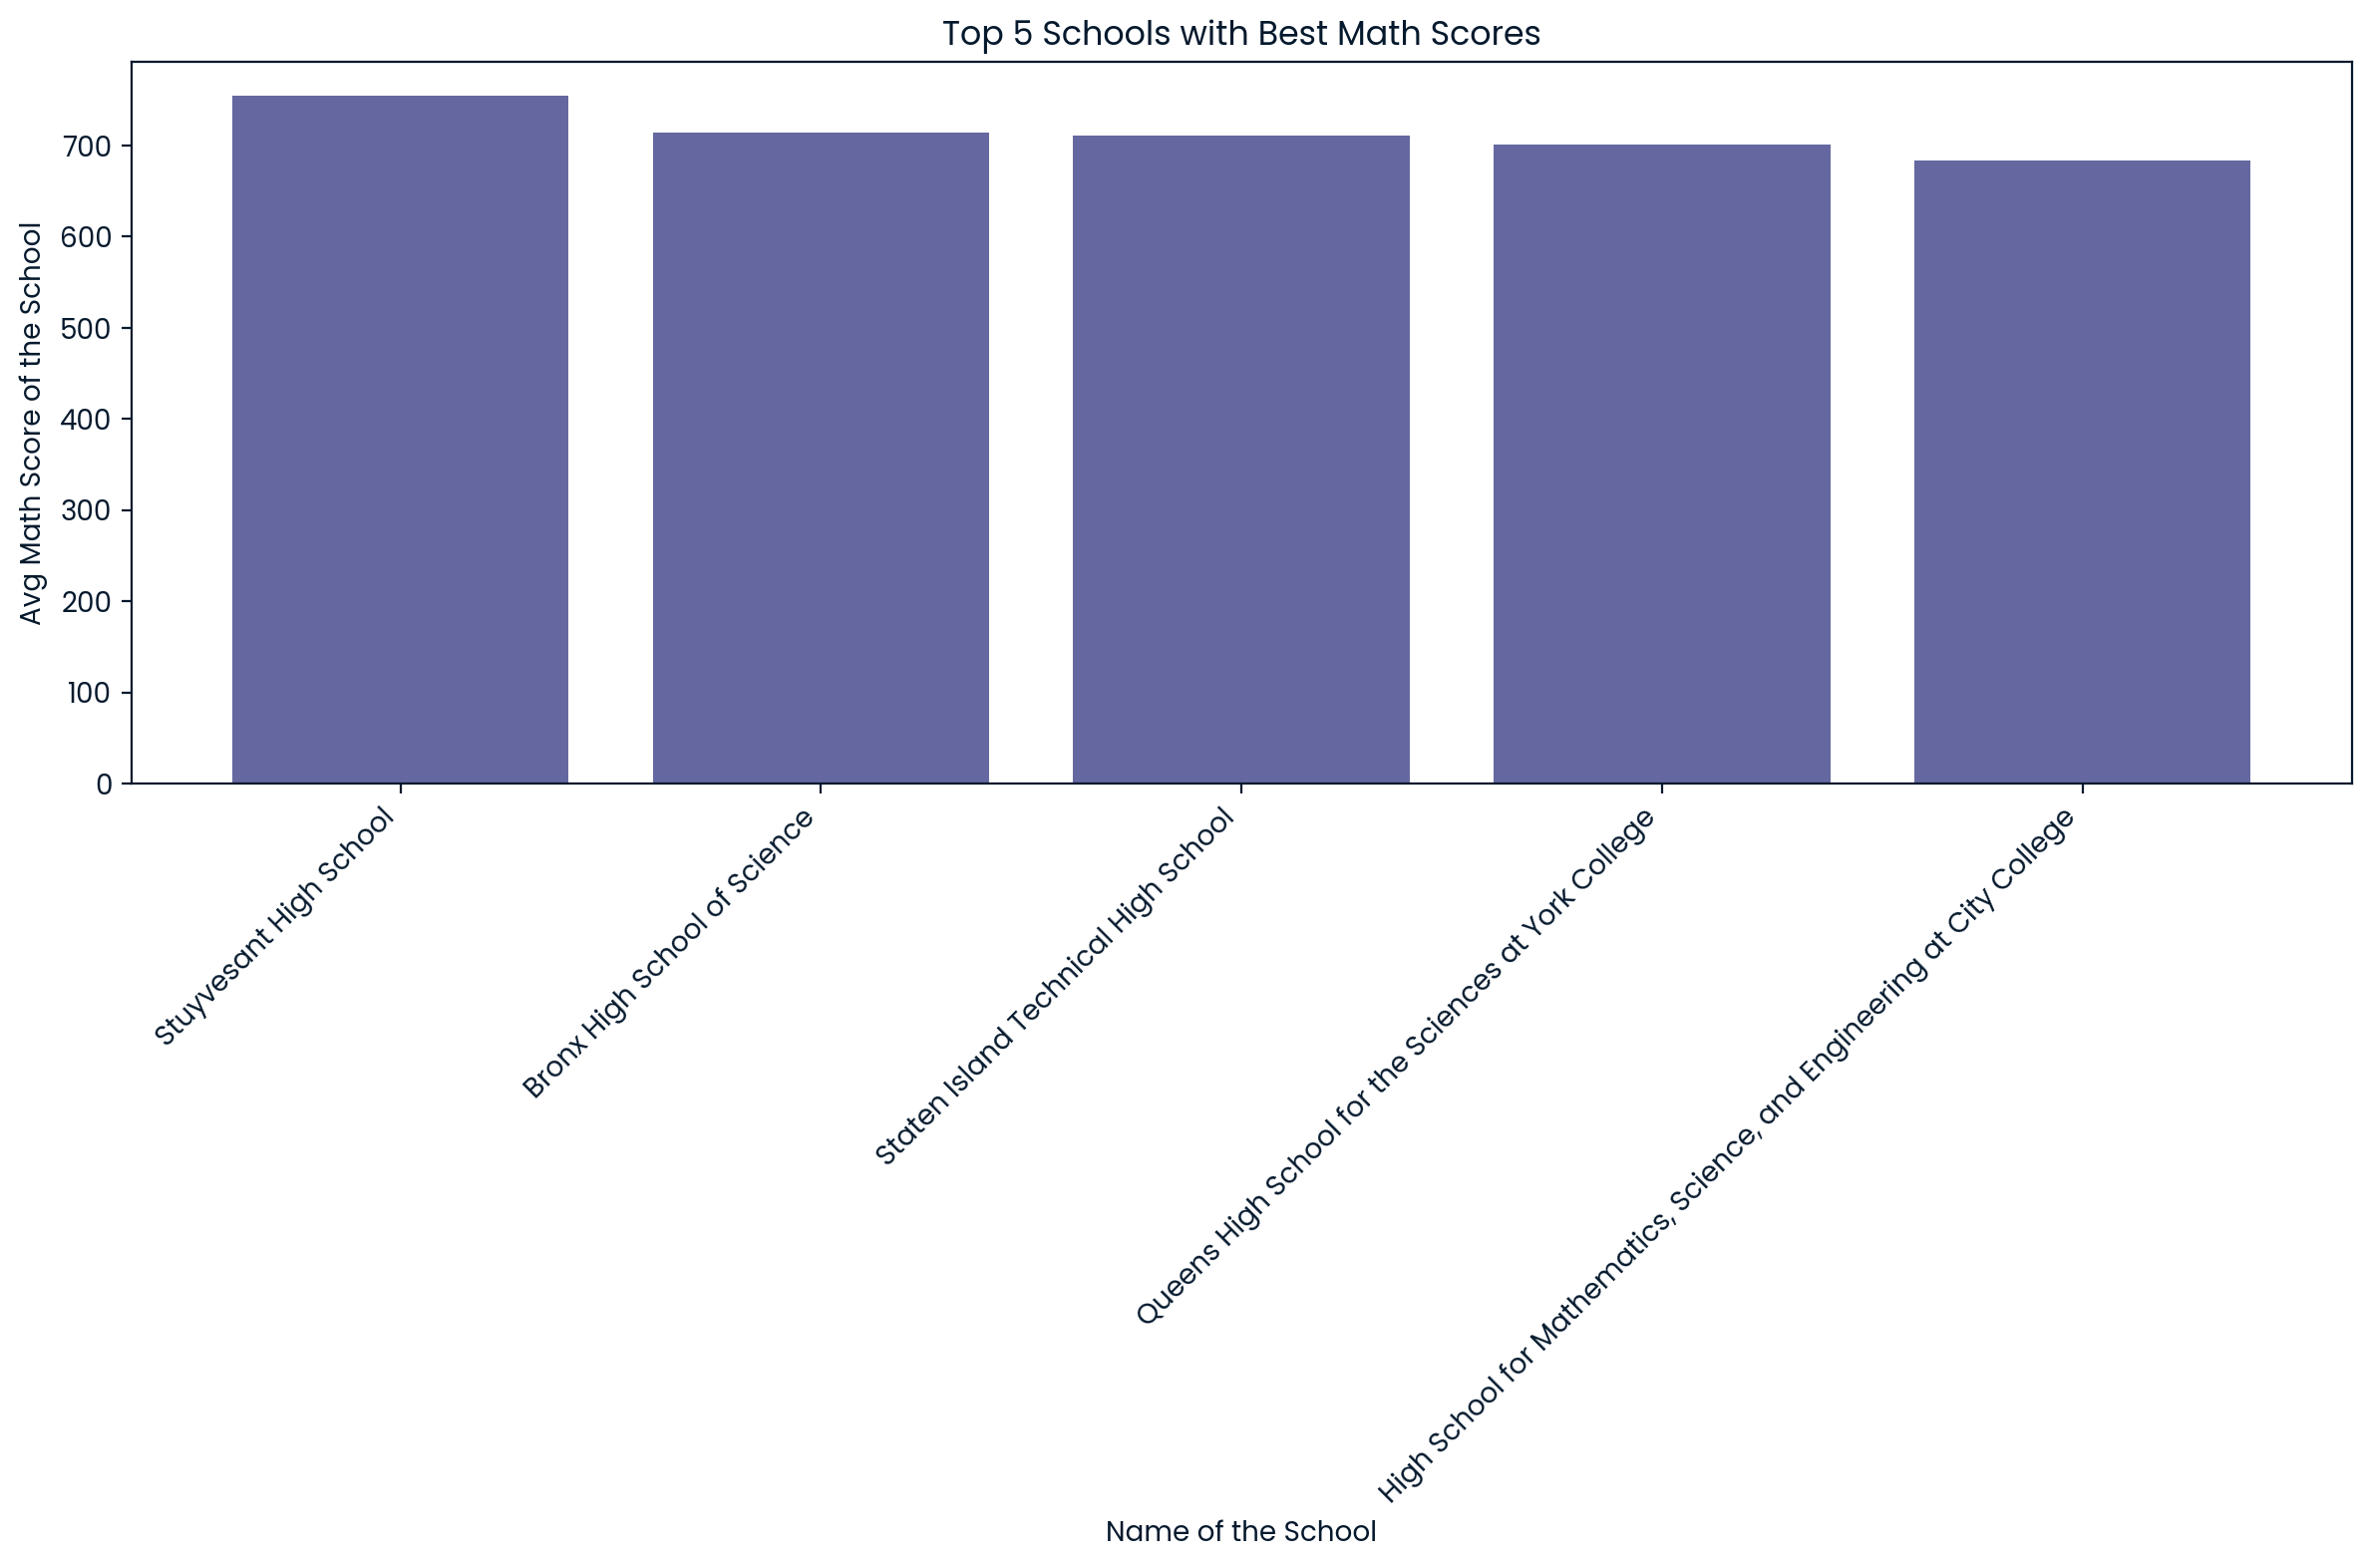

In [8]:
import matplotlib.pyplot as plt

# Select top 5 schools with the best math scores
top_5_best_math_school = best_math_schools.nlargest(5, 'average_math')

# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(top_5_best_math_school['school_name'], top_5_best_math_school['average_math'])
plt.xlabel('Name of the School')
plt.ylabel('Avg Math Score of the School')
plt.title('Top 5 Schools with Best Math Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###TOP 10 PERFORMING SCHOOL

In [9]:
# creteria of best performing school is based on the SAT score of the school
#SAT score is sum of math, reading, and writing scores
SAT = schools[['average_math', 'average_reading', 'average_writing']]
schools['total_SAT'] = SAT.sum(axis=1)
top_schools = schools[['school_name', 'total_SAT']].sort_values('total_SAT', ascending=False)
top_10_schools=top_schools.nlargest(10,'total_SAT')
top_10_schools

,school_name,total_SAT
88,Stuyvesant High School,2144
170,Bronx High School of Science,2041
93,Staten Island Technical High School,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
365,Queens High School for the Sciences at York Co...,1947
5,Bard High School Early College,1914
280,Brooklyn Technical High School,1896
45,Eleanor Roosevelt High School,1889
68,"High School for Mathematics, Science, and Engi...",1889


###BOROUGH HAVING THE LARGEST STANDARD DEVIATION

In [10]:
schools['borough'].unique()

array(['Manhattan', 'Staten Island', 'Bronx', 'Queens', 'Brooklyn'],
      dtype=object)

In [11]:
#standard deviations of schools by their boroughs
borough_std=schools.groupby('borough')['total_SAT'].std()
#to find the max std
max_std=borough_std.max()
max_std
#to find the borough having maximum std
borough_std_max=borough_std.idxmax()
borough_std_max

'Manhattan'

In [12]:
#to calculate no. of schools under borough wiht max std
borough_schools=schools[schools['borough']==borough_std_max].shape[0]
borough_schools

89

In [13]:
#calculating the mean of the total SAT score of the borough having max std
borough_schools_mean=schools[schools['borough']==borough_std_max]['total_SAT'].mean()
borough_schools_mean

1340.1348314606741

In [14]:
#creating Dataframe
largest_std_dev=pd.DataFrame({'borough':borough_std_max,
                             'num_schools':[borough_schools],
                             'average_SAT':[round(borough_schools_mean,2)],
                             'std_SAT':[round(max_std,2)]})
print(largest_std_dev)

     borough  num_schools  average_SAT  std_SAT
0  Manhattan           89      1340.13   230.29


### FINDING RELATIONSHIP BETWEEN AVG READING AND WRITING SCORE OF THE SCHOOL

In [15]:
schools_3=schools[['average_reading','average_writing']]
schools_3.head()

,average_reading,average_writing
0,601,601
1,411,387
2,428,415
3,453,463
4,406,381


In [16]:
#finding correlation between reading and writing score
correlation = schools_3['average_reading'].corr(schools_3['average_writing'])
print(f" Correlation Coefficient: {correlation}")
#The correlation analysis between the reading and writing scores yielded a correlation coefficient of 0.985, indicating a very strong positive relationship

 Correlation Coefficient: 0.9854389581058105


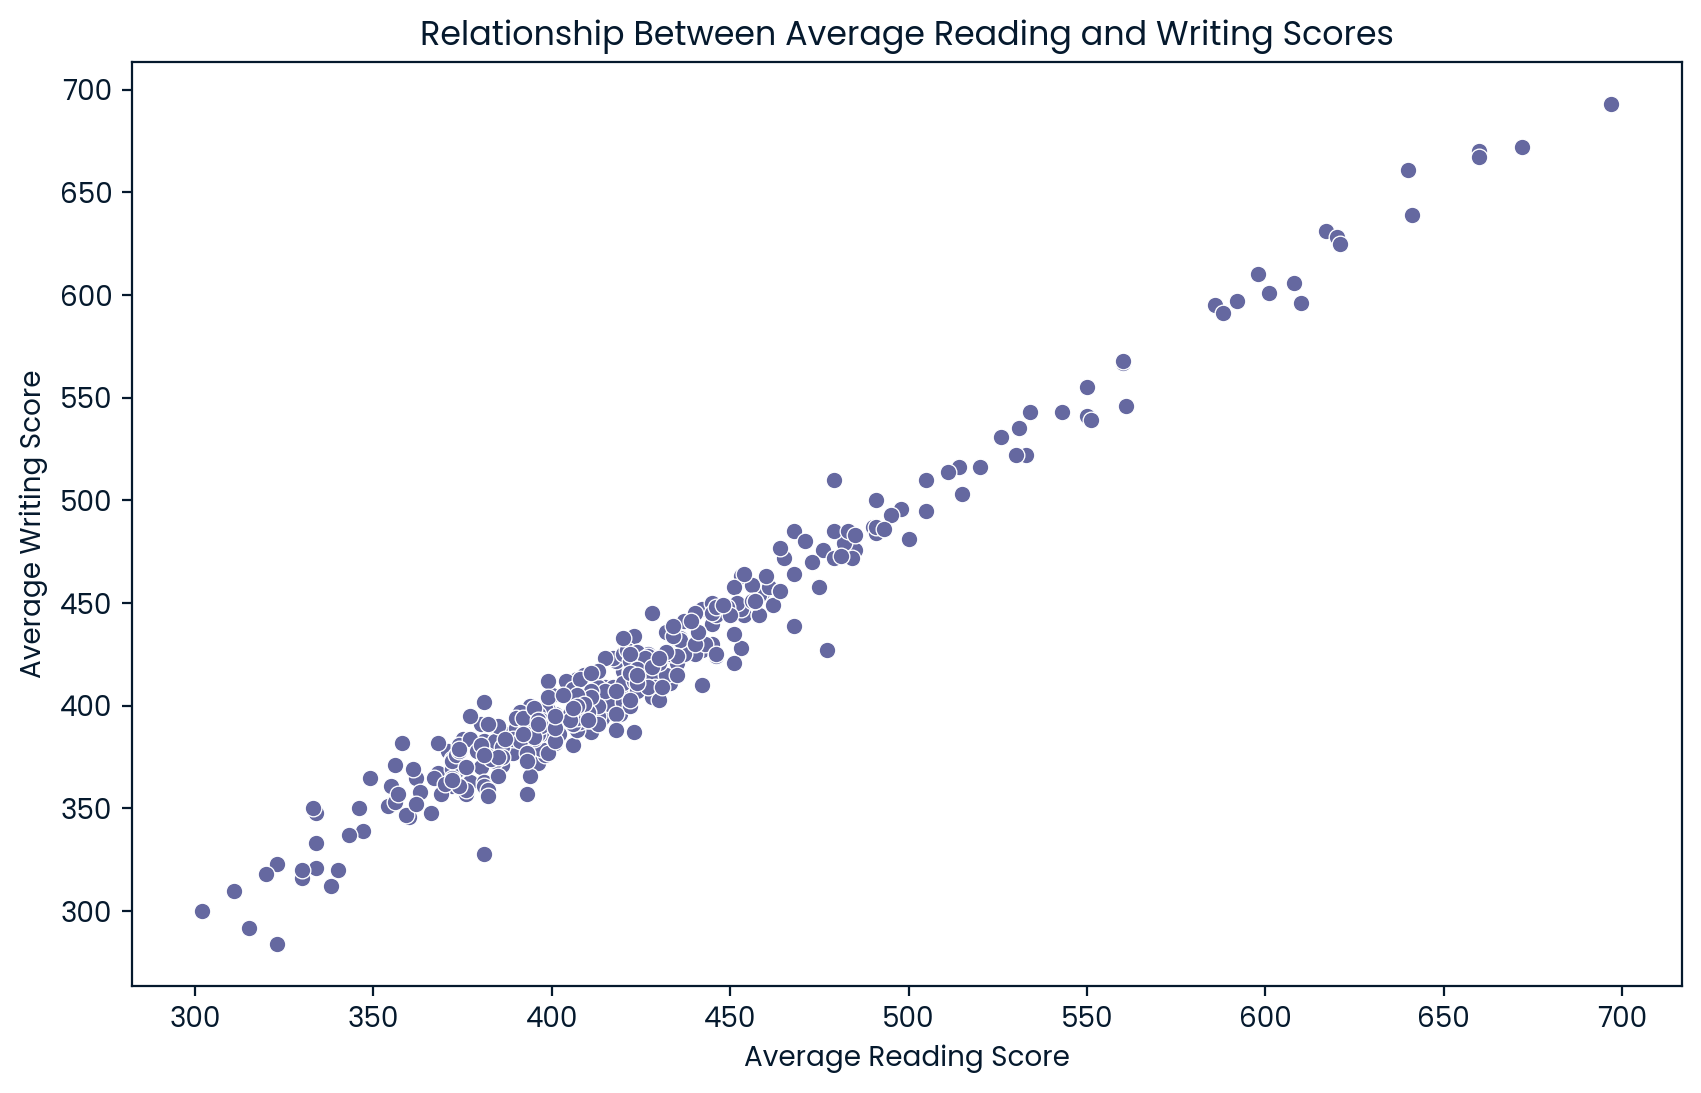

In [17]:
#visualisation
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_reading', y='average_writing', data=schools_3)
plt.title('Relationship Between Average Reading and Writing Scores')
plt.xlabel('Average Reading Score')
plt.ylabel('Average Writing Score')
plt.show()


###BOROUGH HAVING THE MOST SCHOOLS

In [18]:
#grouping the schools by borough
no_of_schools=schools.groupby('borough')['school_name'].count()
no_of_schools

borough
Bronx             98
Brooklyn         109
Manhattan         89
Queens            69
Staten Island     10
Name: school_name, dtype: int64

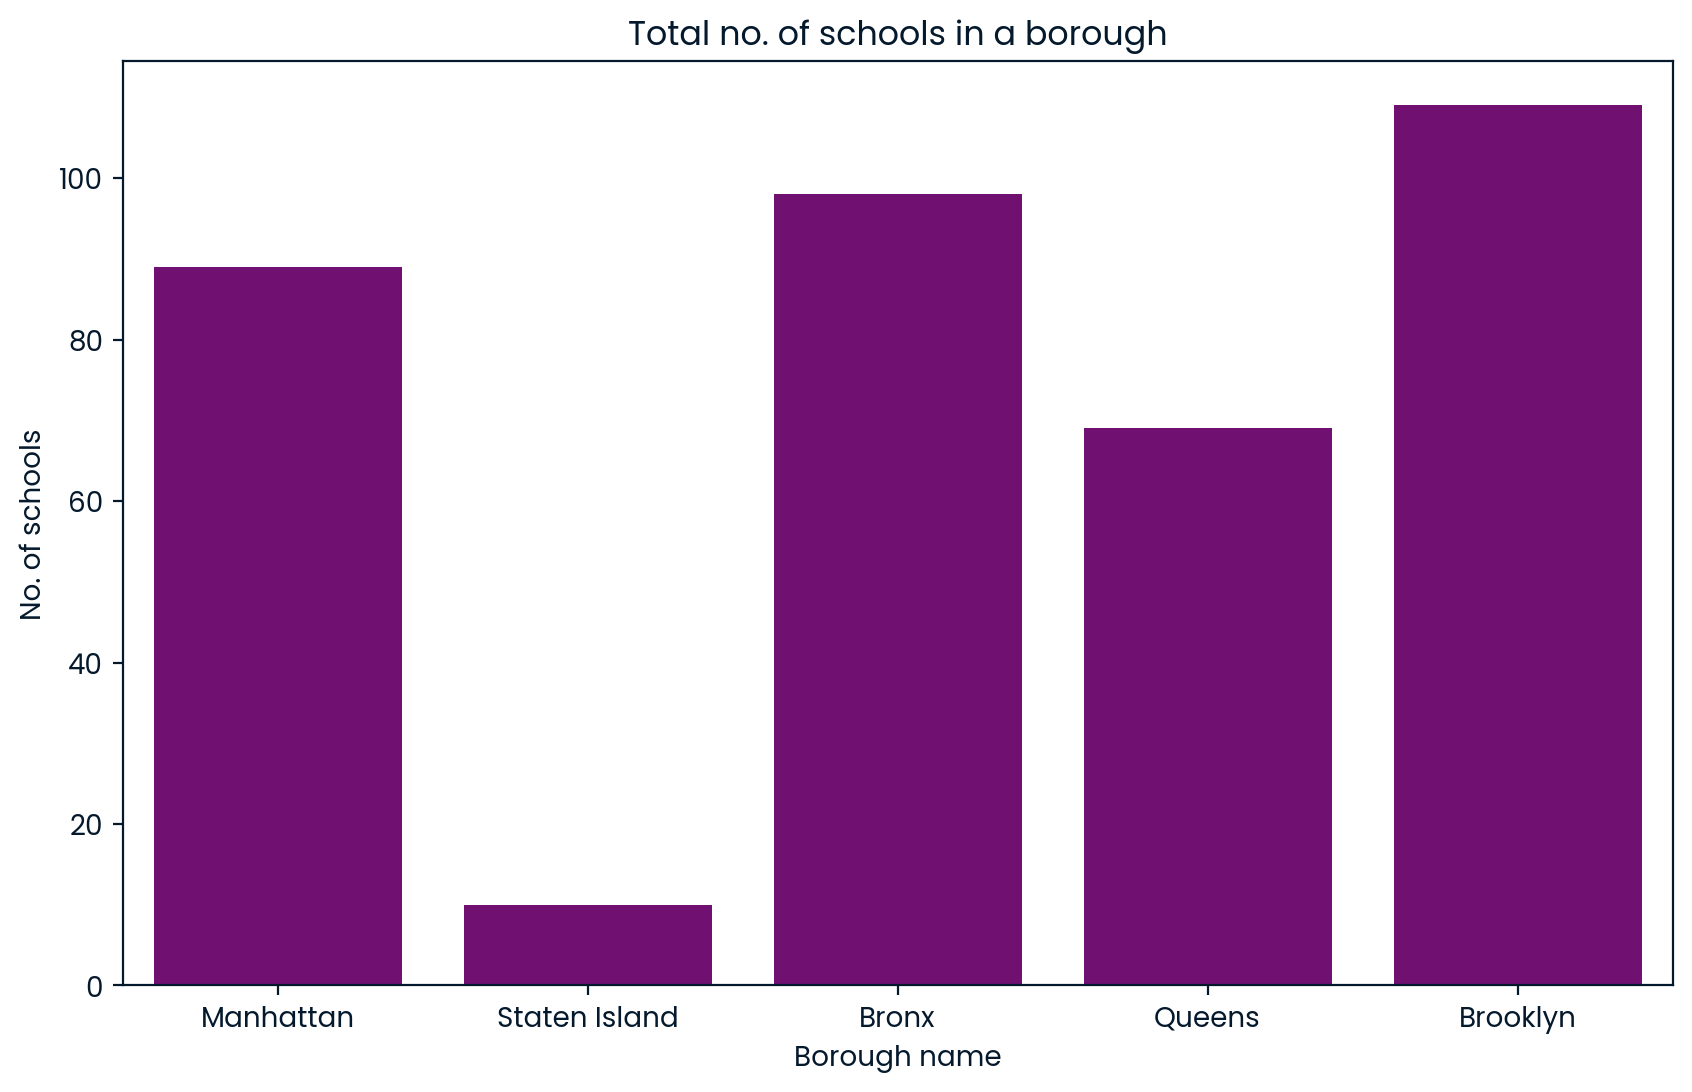

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='borough', data=schools,color='purple')
plt.title('Total no. of schools in a borough')
plt.xlabel('Borough name')
plt.ylabel('No. of schools')
plt.show()

In [20]:
#calculating the borough with highest no. of schools
borough_with_highest_no_of_schools=no_of_schools.idxmax()
borough_with_highest_no_of_schools

'Brooklyn'